In [3]:
import numpy as np
import pandas as pd
import pylab
import math


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import seaborn as sns 


#Q2
#gradient descent to find the logistic regression model
data=pd.read_csv("data.csv", error_bad_lines=False) 

In [5]:
x1 = data.x1.values
x2 = data.x2.values
Y = data.y.values
X12 = data[['x1','x2']]
x12 = X12.to_numpy() 
X = np.hstack([np.ones((X12.shape[0], 1)), X12.values])
X=data.values[:, :-1]

In [6]:
x1

array([ 3.81,  0.23,  3.05,  0.68,  2.67, -2.04, -0.72, -2.46, -3.51,
       -2.05])

x1

In [93]:
X[:,0]

array([ 3.81,  0.23,  3.05,  0.68,  2.67, -2.04, -0.72, -2.46, -3.51,
       -2.05])

In [94]:
X.shape

(10, 3)

In [102]:
theta0 = 0
theta1 = 0
theta2 = 0
L = 0.001
epochs = 1000

def sigmoid(X, theta0, theta1, theta2):
    return np.array([1 / (1 + math.exp(-1*theta0 + -1*theta1*x[0] + -1*theta2*x[1] )) for x in X])



In [103]:
for epoch in range(epochs):
    y_pred = sigmoid(X, theta0, theta1, theta2)
    D_theta0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
    D_theta1 = -2 * sum(X[:,0] * (Y - y_pred) * y_pred * (1 - y_pred)) 
    D_theta2 = -2 * sum(X[:,1] * (Y - y_pred) * y_pred * (1 - y_pred)) 

    theta0 = theta0 - L * D_theta0
    theta1 = theta1 - L * D_theta1
    theta2 = theta2 - L * D_theta2   

In [110]:
theta_final=print(theta0,theta1,theta2)   

0.014608623502283292 0.7295112221404941 0.6571141255654067


In [111]:
data = data.assign(Y2=lambda f: f['y'])
data.loc[lambda f: f['Y2']==0, 'Y2'] = -1

In [112]:
y_3 = data.Y2.values

In [113]:
x1_vec = np.linspace(data["x1"].min(),data["x1"].max(),2);
x1_vec

array([-3.51,  3.81])

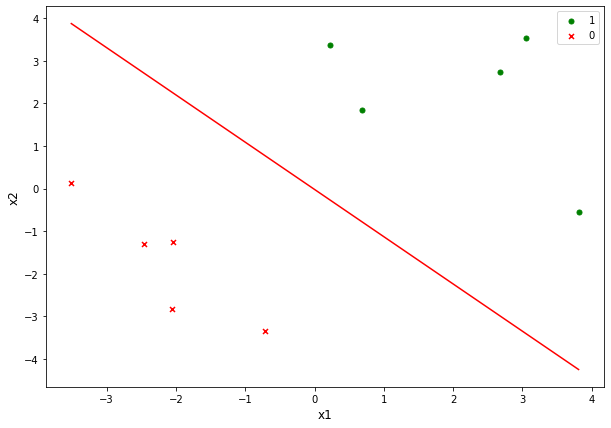

In [117]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

trues = data[data.y.values == 1]
falses = data[data.y.values == 0]

ax1.scatter(trues['x1'],trues['x2'], s=25, c='g', marker="o", label='1')
ax1.scatter(falses['x1'],falses['x2'], s=25, c='r', marker="x", label='0')
plt.plot(x1_vec,(-x1_vec*0.7295112221404941-0.014608623502283292)/0.6571141255654067, color="red"); #  Plot decision boundary

plt.legend(loc='upper right');
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
fig.set_size_inches(10, 7) 
plt.show() 



mean1 =  [[2.088]
 [2.186]]
mean2 =  [[-2.156]
 [-1.72 ]]


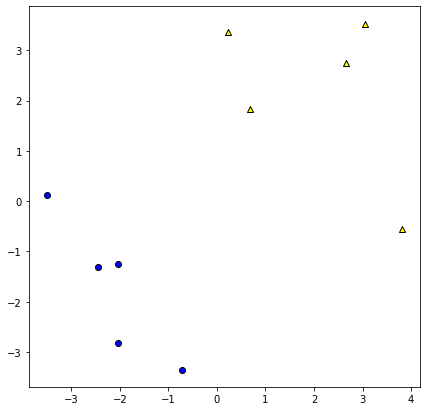

In [119]:
#Q3
#computing the covariances, means

label1 = np.array([[3.81,0.23,3.05,0.68,2.67],[-0.55,3.37,3.53,1.84,2.74]])
label2 = np.array([[-2.04,-0.72,-2.46,-3.51,-2.05],[-1.25,-3.35,-1.31,0.13,-2.82]])

#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

ax0.scatter(label1[0],label1[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(label2[0],label2[1],marker='o',c='blue',edgecolor='black')

# Calculating the mean vectors
mean_1 = np.mean(label1,axis=1).reshape(2,1)
print('mean1 = ',mean_1)
mean_2 = np.mean(label2,axis=1).reshape(2,1)
print('mean2 = ',mean_2)
sca_1 = np.dot((label1-mean_1),(label1-mean_1).T)
sca_2 = np.dot((label2-mean_2),(label2-mean_2).T)



In [12]:
#covariance matrix
k=len(label1.T) + len(label2.T)
sigma = (sca_1 + sca_2)/k
sigma

array([[ 1.36766 , -0.984104],
       [-0.984104,  1.879892]])